<a href="https://colab.research.google.com/github/AAdewunmi/Optical_Character_Recognition_Project/blob/main/Optical_Character_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Optical Character Recognition Project

Date: May 17, 2025

Objective: In this project, we will be working on extracting text from images. After extracting the text we will apply some basic functions of OpenCv on the text to enhance it and to get more accurate results. This project will be very useful as it will save time and effort required to extract text from images.

Step 1: We will import request library for fetching the URL of files and images.

In [27]:
# Import requests to install Tesseract
import requests

Step 2: We will download tesseract-ocr data which is required for pytesseract library to run and save the file at the path specified in open() function.

In [28]:
# Download tesseract-ocr dataset
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)

# Writing data to file to avoid path issues
with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddate", "wb") as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

Step 3: We will install Tesseract and the required libraries for OCR and we will import IPython functions to clear the undesired output.

In [29]:
# Install Tesseract and required packages
!apt-get install -y tesseract-ocr libtesseract-dev

# Import IPython to clear output which is not important
from IPython.display import HTML, clear_output
clear_output()

In [30]:
# Install Python wrapper for Tesseract
!pip install pytesseract
clear_output()

In [31]:
# Install ImageMagick for image preprocessing
!apt-get install -y imagemagick
clear_output()

In [32]:
# Check ImageMagick is installed
!convert --version

Version: ImageMagick 6.9.11-60 Q16 x86_64 2021-01-25 https://imagemagick.org
Copyright: (C) 1999-2021 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP(4.5) 
Delegates (built-in): bzlib djvu fftw fontconfig freetype heic jbig jng jp2 jpeg lcms lqr ltdl lzma openexr pangocairo png tiff webp wmf x xml zlib


In [33]:
# Check tesseract is installed
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


Step 4: We will install OpenCV

In [34]:
# Installing pytesseract and opencv
!pip install pytesseract wand opencv-python
clear_output()

In [35]:
# Check opencv-python is installed
import cv2
print(cv2.__version__)

4.11.0


Step 5: We will import all the necessary libraries.

In [36]:
# Import libraries
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

Step 6: We will open an image from a designated URL, then save it for visualisation and further processing.

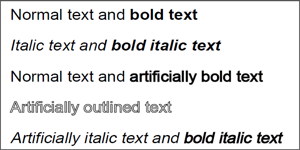

In [37]:
# Reading image from url
image = Image.open(requests.get('https://i.sstatic.net/pbIdS.png', stream=True).raw)
image = image.resize((300, 150))
image.save('sample.png')
image

Step 7: We will extract the text from our image using custom configuration.

In [38]:
# Extracting text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



Step 8: We will remove unwanted symbols from the text we extract by replacing the symbol with an empty string.

In [39]:
try:
  text=pytesseract.image_to_string(image, lang="eng")
  characters_to_remove = "!()@-*>+-/,'|Â£$#%&^_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
  print("Error (%s)." % e)

 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 

 



Step 9: We will read the image into opencv format and process it. This is required when we need to extract the text from complex images.

In [40]:
# Perform opencv operations to get text from complex images
image = cv2.imread('sample.png')

Step 10: We will convert the image to grayscale so that it becomes less complex to process as it will have only two values 0 and 1. cv2.cvtColor() method is used to convert an image from one color space to another. There are more than 150 color-space conversation methods available in OpenCV.

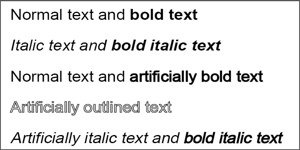

In [41]:
# Get Grayscale image
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)